# Problem 1a

We would prefer the second histogram because it more accurately depicts the variation in the data, whereas the first histogram's scaling is distorted by outliers in the far right of the distribution.


Mean: 720.2779753272437
Median: 172.21
Maximum: 227967.25
Minimum: 0.01
Std Dev: 3972.663756393663




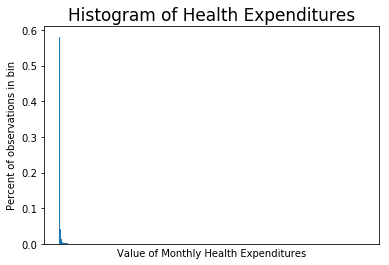

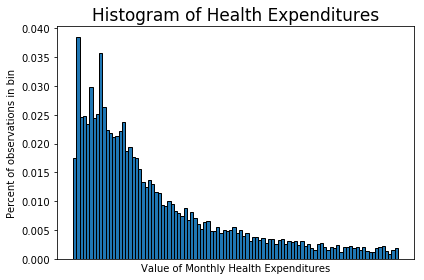

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt


clms = np.loadtxt("clms.txt")
clms = clms.reshape(len(clms),1)
mean = np.mean(clms)
median = np.median(clms)
maximum = np.max(clms)
minimum = np.min(clms)
sd = np.std(clms)


desc = '''
Mean: {0}
Median: {1}
Maximum: {2}
Minimum: {3}
Std Dev: {4}

'''

print (desc.format(mean, median, maximum, minimum, sd))

num_bins = 1000
weights = (1 / clms.shape[0]) * np.ones_like(clms)
n, bin_cuts, patches = plt.hist(clms, num_bins, weights=weights)
plt.title('Histogram of Health Expenditures', fontsize=17)
plt.xlabel(r'Value of Monthly Health Expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.gca().axes.get_xaxis().set_ticks([])

plt.show()

num_bins2 = 100
clms2 = clms[clms <= 800]
weights2 = (1 / clms.shape[0]) * np.ones_like(clms2)
n2, bin_cuts2, patches2 = plt.hist(clms2, num_bins2, weights=weights2, edgecolor = "black")
plt.title('Histogram of Health Expenditures', fontsize=17)
plt.xlabel(r'Value of Monthly Health Expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.gca().axes.get_xaxis().set_ticks([])    
plt.tight_layout()

plt.show()






# Problem 1b


In [28]:
# Define function that generates values of a potentially trucated gamma
# probability density function (PDF)

from scipy import special

def truncgamma_pdf(xvals, alpha, beta):
    
    pdf_vals = (1/((beta**alpha)*special.gamma(alpha)))*(xvals**(alpha-1))*np.exp(-xvals/beta)
    return pdf_vals

beta_s = (np.var(clms))/np.mean(clms)
alpha_s = np.mean(clms)/beta_s
print(alpha_s, beta_s)
truncgamma_pdf(clms, alpha_s, beta_s).sum()

0.0328727966942 21911.0647028


12.686769885177878

In [29]:
# Define log likelihood function for the gamma distribution
def log_lik_trgamma(xvals, alpha, beta):
 
    pdf_vals = truncgamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

log_lik_trgamma(clms, alpha_s , beta_s)

-93555.393903452175

In [30]:
def crit(params, xvals):
  
    alpha, beta = params
    #xvals = args
    log_lik_val = log_lik_trgamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

params = np.array([alpha_s, beta_s])
crit(params, clms)

93555.393903452175

      fun: 82076.451605662558
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        ,  0.09022187])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.21755323e-01,   2.19110647e+04])
alpha_MLE= 0.221755322727  beta_MLE= 21911.0646992


/Users/benjaminlim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


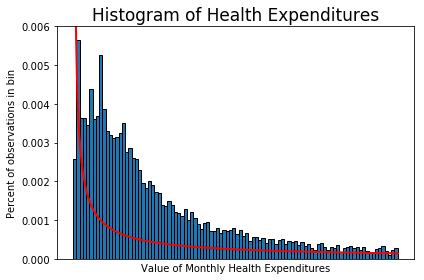

MLE log-likelihood:  -82076.4516057


In [67]:
import scipy.optimize as opt
beta_init = (np.var(clms))/np.mean(clms)
alpha_init = np.mean(clms)/beta_init
params_init = np.array([alpha_init, beta_init])
mle_args = (clms)
results = opt.minimize(crit, params_init, args=(mle_args), method='L-BFGS-B',
                       bounds=((1e-10, None), (1e-10, None)))
print(results)
alpha_MLE, beta_MLE = results.x
print('alpha_MLE=', alpha_MLE, ' beta_MLE=', beta_MLE)
results

num_bins2 = 100
clms2 = clms[clms <= 800]
weights2 = (1 / clms.shape[0]) * np.ones_like(clms2)
n2, bin_cuts2, patches2 = plt.hist(clms2, num_bins2, normed = True, edgecolor = "black")

dist_pts = np.linspace(0, 800, 1000)

plt.plot(dist_pts, truncgamma_pdf(dist_pts, alpha_MLE, beta_MLE),
         linewidth=2, color='r', label='3: $\mu$=622,$\sigma$=199')

plt.title('Histogram of Health Expenditures', fontsize=17)
plt.xlabel(r'Value of Monthly Health Expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.ylim((0, 0.006))
plt.gca().axes.get_xaxis().set_ticks([])    
plt.tight_layout()

plt.show()

print('MLE log-likelihood: ', log_lik_trgamma(clms, alpha_MLE, beta_MLE))




# Problem 1c

In [42]:
all(i > 0 for i in clms)

True

      fun: 82076.446790851536
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.65544111,  0.09022187, -1.04482751])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([  2.21737618e-01,   2.19110644e+04,   9.97091564e-01])
alpha_MLE_gg= 0.221737617595  beta_MLE_gg= 21911.0644318  m_MLE_gg= 0.997091563777


/Users/benjaminlim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


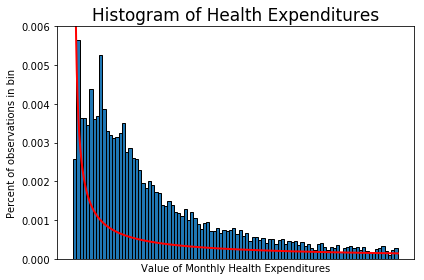

MLE log-likelihood:  -82076.4467865


In [66]:
def gengamma_pdf(xvals, alpha, beta, m):
    
    pdf_vals = (m/((beta**alpha)*special.gamma(alpha/m)))*(xvals**(alpha-1))*(np.exp(-(xvals/beta)**m))
    return pdf_vals

# Define log likelihood function for the gen gamma distribution
def log_lik_gengamma(xvals, alpha, beta, m):
 
    pdf_vals = gengamma_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit_gg(params, xvals):
  
    alpha, beta, m = params
    log_lik_val = log_lik_gengamma(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

m_init = 1
beta_init_gg = beta_MLE
alpha_init_gg = alpha_MLE
params_init = np.array([alpha_init_gg, beta_init_gg, m_init])
mle_args = (clms)
results = opt.minimize(crit_gg, params_init, args=(mle_args), method='L-BFGS-B',
                       bounds=((1e-10, None), (1e-10, None), (1e-10, None)))
print(results)
alpha_MLE_gg, beta_MLE_gg, m_MLE_gg = results.x
print('alpha_MLE_gg=', alpha_MLE_gg, ' beta_MLE_gg=', beta_MLE_gg, ' m_MLE_gg=', m_MLE_gg)
results

num_bins2 = 100
clms2 = clms[clms <= 800]
weights2 = (1 / clms.shape[0]) * np.ones_like(clms2)
n2, bin_cuts2, patches2 = plt.hist(clms2, num_bins2, normed = True, edgecolor = "black")

dist_pts = np.linspace(0, 800, 1000)

plt.plot(dist_pts, gengamma_pdf(dist_pts, alpha_MLE_gg, beta_MLE_gg, m_MLE_gg),
         linewidth=2, color='r', label='3: $\mu$=622,$\sigma$=199')

plt.title('Histogram of Health Expenditures', fontsize=17)
plt.xlabel(r'Value of Monthly Health Expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.ylim((0, 0.006))
plt.gca().axes.get_xaxis().set_ticks([])    
plt.tight_layout()

plt.show()

print('MLE log-likelihood: ', log_lik_gengamma(clms, alpha_MLE, beta_MLE, m_MLE_gg))

# Problem 1d

      fun: 76460.096045756887
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 11.56004146,   0.        ,  10.78296918,   1.09721441])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 130
      nit: 12
   status: 0
  success: True
        x: array([  6.99172363e-01,   2.25077020e+08,   9.96061454e-01,
         1.00018936e+04])
a_MLE_gb2= 0.699172363143  b_MLE_gb2= 225077019.503  p_MLE_gb2= 0.996061454057  q_MLE_gb2= 10001.8935816


/Users/benjaminlim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


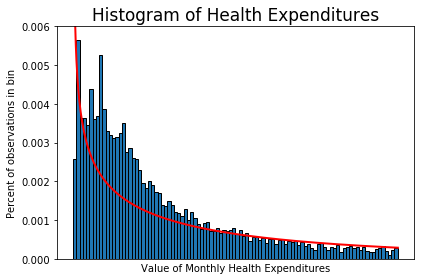

MLE log-likelihood:  -76460.0960458


In [68]:
def gb2_pdf(xvals, a, b, p, q):
    
    pdf_vals = (a*(xvals**(a*p-1)))/(b**(a*p) * special.beta(p,q)*((1+(xvals/b)**a)**(p+q)))
    return pdf_vals

# Define log likelihood function for the gen gamma distribution
def log_lik_gb2(xvals, a, b, p, q):
 
    pdf_vals = gb2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit_gb2(params, xvals):
  
    a, b, p, q = params
    log_lik_val = log_lik_gb2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

a_init = m_MLE_gg
q_init = 10000
b_init = (q_init**(1/m_MLE_gg))*beta_MLE_gg
p_init = alpha_MLE_gg/m_MLE_gg 

params_init = np.array([a_init, b_init, p_init, q_init])
mle_args = (clms)
results = opt.minimize(crit_gb2, params_init, args=(mle_args), method='L-BFGS-B',
                       bounds=((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None)))
print(results)
a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2 = results.x
print('a_MLE_gb2=', a_MLE_gb2, ' b_MLE_gb2=', b_MLE_gb2, ' p_MLE_gb2=', p_MLE_gb2, ' q_MLE_gb2=', q_MLE_gb2)
results

num_bins2 = 100
clms2 = clms[clms <= 800]
weights2 = (1 / clms.shape[0]) * np.ones_like(clms2)
n2, bin_cuts2, patches2 = plt.hist(clms2, num_bins2, normed = True, edgecolor = "black")

dist_pts = np.linspace(0, 800, 1000)

plt.plot(dist_pts, gb2_pdf(dist_pts, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2),
         linewidth=2, color='r', label='3: $\mu$=622,$\sigma$=199')

plt.title('Histogram of Health Expenditures', fontsize=17)
plt.xlabel(r'Value of Monthly Health Expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.ylim((0, 0.006))
plt.gca().axes.get_xaxis().set_ticks([])    
plt.tight_layout()

plt.show()

print('MLE log-likelihood: ', log_lik_gb2(clms, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2))

# Problem 1e

In [73]:
import scipy.stats as sts


#LR TEST for 1b)
log_lik_1b = log_lik_trgamma(clms, alpha_MLE, beta_MLE)
log_lik_1d = log_lik_gb2(clms, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2)
print(log_lik_1b, log_lik_1d)
LR_val_1b = 2 * (log_lik_1d - log_lik_1b)
pval_h0_1b = 1.0 - sts.chi2.cdf(LR_val_1b, 4)
print('chi squared of H0_1b with 4 degrees of freedom p-value = ', pval_h0_1b)

#LR TEST for 1c)
log_lik_1c = log_lik_gengamma(clms, alpha_MLE, beta_MLE, m_MLE_gg)
log_lik_1d = log_lik_gb2(clms, a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2)
print(log_lik_1c, log_lik_1d)
LR_val_1c = 2 * (log_lik_1d - log_lik_1c)
pval_h0_1c = 1.0 - sts.chi2.cdf(LR_val_1c, 4)
print('chi squared of H0_1c with 4 degrees of freedom p-value = ', pval_h0_1c)


-82076.4516057 -76460.0960458
chi squared of H0_1b with 4 degrees of freedom p-value =  0.0
-82076.4467865 -76460.0960458
chi squared of H0_1c with 4 degrees of freedom p-value =  0.0


# Problem 1f

In [82]:
from scipy.integrate import quad

def gb2_integrand(x, a, b, p, q):
    
    return (a*(x**(a*p-1)))/(b**(a*p) * special.beta(p,q)*((1+(x/b)**a)**(p+q)))

def gamma_integrand(x, alpha, beta):
    
    return (1/((beta**alpha)*special.gamma(alpha)))*(x**(alpha-1))*np.exp(-x/beta)

#LIKELIHOOD OF GETTING MONTHLY CLAIM > $1000 UNDER GB2 (1d)
pval_1d = quad(gb2_integrand, 0, 1000, args =(a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2))
print("Likelihood of getting claim >$1000 under GB2: ", 1.0 - pval_1d[0])

#LIKELIHOOD OF GETTING MONTHLY CLAIM > $1000 UNDER GA (1b)
pval_1b = quad(gamma_integrand, 0, 1000, args = (alpha_MLE, beta_MLE))
print("Likelihood of getting claim >$1000 under GA: ", 1.0 - pval_1b[0])



Likelihood of getting claim >$1000 under GB2:  0.16253935891635163
Likelihood of getting claim >$1000 under GA:  0.4519597444784573
